# Individual Project #

## EDA ## 

Let us first import some necessary packages and read in the data (throughout the notebook, other packages/functions will be imported as needed).

In [ ]:
import numpy as np
import sklearn as sk
import pandas as pd
from sklearn.model_selection import train_test_split
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

data = pd.read_csv("pathto/yourdata.csv")

In [ ]:
data.head()

,Unnamed: 0,label,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30
0,0,3,-4.429067,0.377727,-2.963724,1.626512,1.884992,-1.363357,1.370328,5.920529,...,2.734965,-2.395956,2.549603,3.870006,0.920918,0.687152,-0.800396,0.414963,1.884992,-1.696312
1,1,1,1.898196,0.780858,5.671914,0.579679,0.943372,-0.641204,1.741677,7.392606,...,2.712624,3.737783,14.262717,-3.291599,-1.319796,-3.293863,-0.889238,-0.589609,0.943372,2.062878
2,2,0,1.120561,0.126517,1.404920,5.813648,-2.420401,0.040846,6.206180,-13.210069,...,-5.133013,3.558561,4.648462,-3.521465,0.598013,0.522285,0.415171,-2.370776,-2.420401,1.097086
3,3,3,-2.768545,-1.086864,-0.471196,-1.096508,1.356528,1.590589,4.042405,4.819356,...,2.235441,0.614585,5.084471,-1.258557,-0.345440,-1.374396,-1.913114,-1.972853,1.356528,0.473372
4,4,1,-6.133483,-0.241138,-2.029252,2.178718,-2.417839,-0.064738,0.749034,-4.642161,...,2.790421,2.417585,-0.924235,-0.185925,6.396354,0.620583,-0.752571,4.586350,-2.417839,1.467844


We check for NaN entries. 

In [ ]:
nan_columns = data.isnull().sum()
nan_columns[nan_columns > 0]

Series([], dtype: int64)

Let us denote the labels Y and the rest of the dataset X, and take a closer look at the features.

In [ ]:
Y = data['label']
X = data.loc[:, 'feature_1':]

X.describe()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30
count,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,...,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000
mean,-0.117716,0.121773,0.117136,0.166206,0.132826,0.087348,0.225664,-0.145979,-0.034560,0.086678,...,-0.003300,0.508578,0.377165,-0.314544,-0.148739,0.147192,0.073470,0.085756,0.132826,0.313256
std,2.746758,1.007093,2.699639,2.623426,2.684540,1.017633,2.762312,6.649989,2.823334,1.013252,...,2.792266,2.580446,7.079606,2.660422,2.720986,2.546427,0.995112,2.846036,2.684540,2.517158
min,-9.694912,-3.275774,-9.194516,-8.391069,-7.861810,-2.674387,-9.440106,-20.860371,-9.656239,-3.343497,...,-7.884572,-7.797305,-25.581823,-9.442885,-8.749011,-11.329299,-3.014468,-8.287636,-7.861810,-8.873884
25%,-1.952210,-0.582217,-1.715414,-1.614133,-1.743925,-0.603026,-1.608057,-4.585134,-1.925908,-0.593335,...,-1.790183,-1.163445,-4.326433,-2.157904,-2.068700,-1.621042,-0.618954,-1.823859,-1.743925,-1.306019
50%,-0.071386,0.126945,0.137681,0.139699,0.180284,0.070859,0.217019,-0.327564,-0.059815,0.095102,...,0.005305,0.465651,0.640424,-0.381468,-0.171549,0.130862,0.063385,0.083376,0.180284,0.314809
75%,1.651956,0.752346,1.783600,2.010452,1.974150,0.798984,2.122928,4.110604,1.782478,0.800876,...,1.825851,2.269361,5.031488,1.398094,1.764022,1.951829,0.726170,2.041171,1.974150,1.937352
max,9.571997,3.785281,9.499732,9.464117,10.099418,2.860047,11.862920,26.301604,8.838732,3.167565,...,10.360982,8.838560,23.461875,8.608281,9.547244,8.129986,3.605571,9.546930,10.099418,9.294371


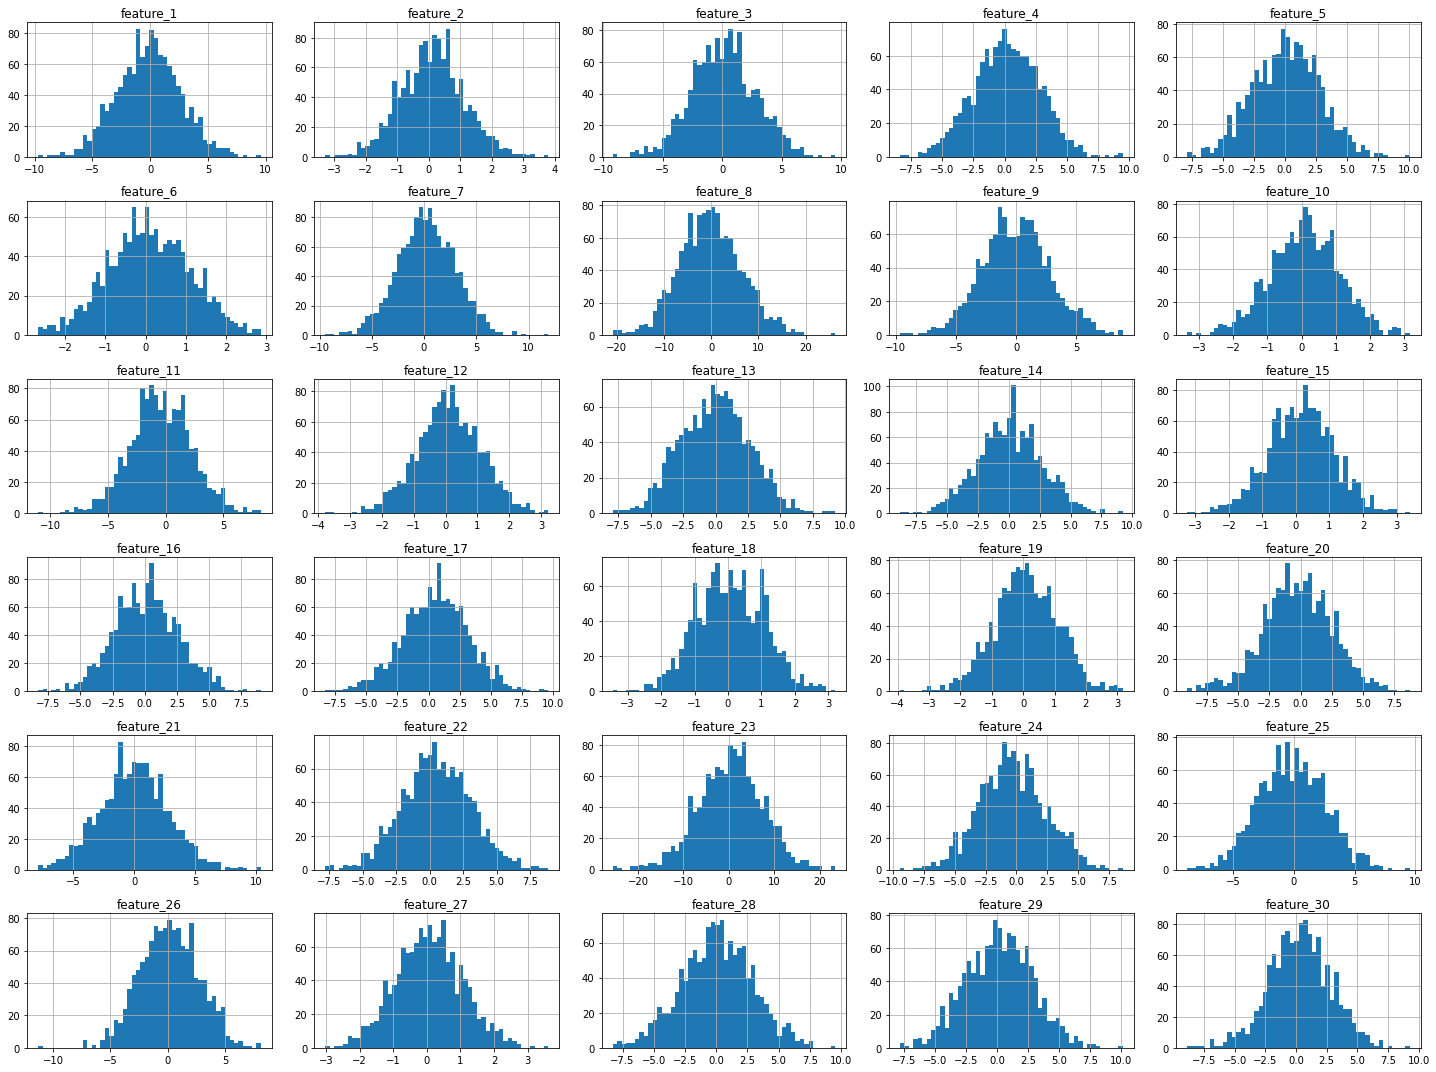

In [ ]:
X.hist(bins=50, figsize=(20, 15))
plt.tight_layout()
plt.show()

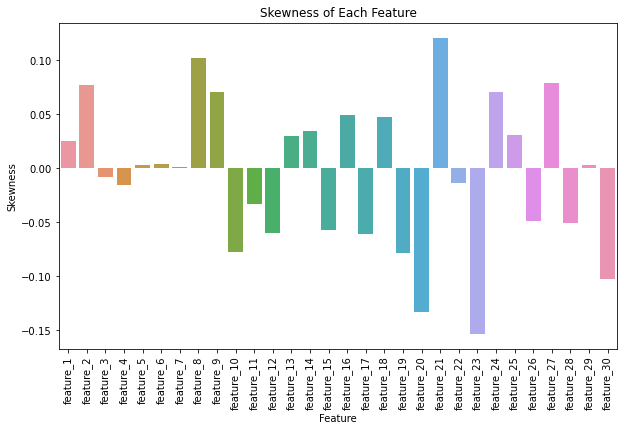

In [ ]:
from scipy.stats import skew
import seaborn as sns

skewness = X.apply(skew)

skewness_df = pd.DataFrame(skewness, columns=['Skewness'])

plt.figure(figsize=(10, 6))
sns.barplot(x=skewness.index, y=skewness.values)
plt.xticks(rotation=90)
plt.title('Skewness of Each Feature')
plt.ylabel('Skewness')
plt.xlabel('Feature')
plt.show()
plt.show()

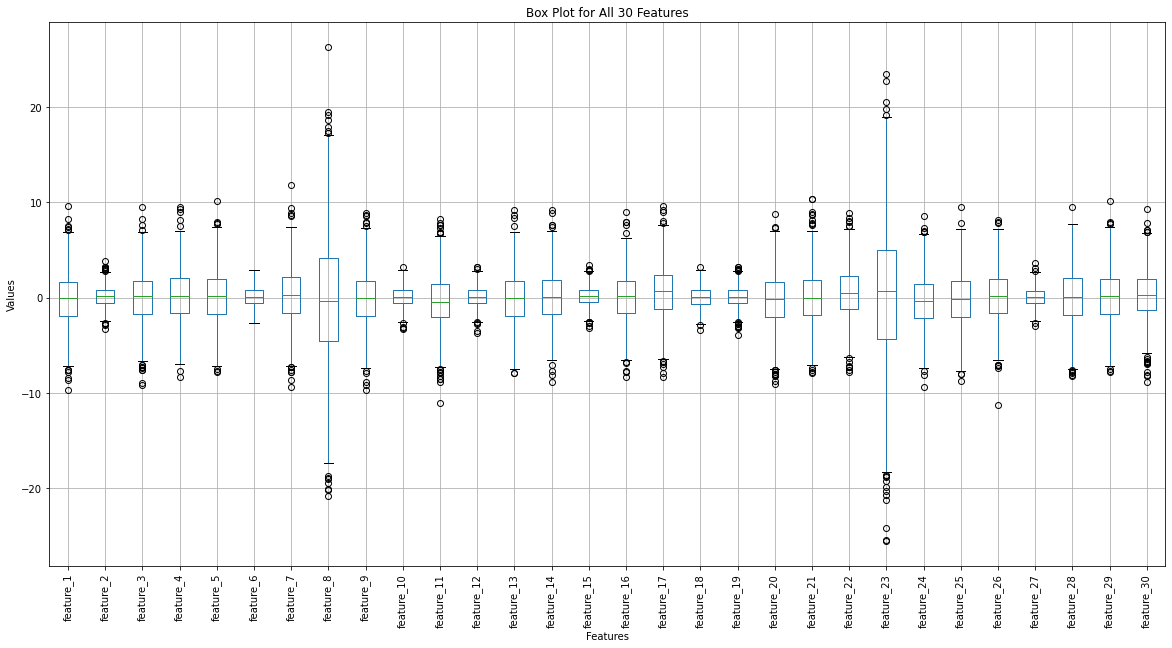

In [ ]:
plt.figure(figsize=(20, 10))

X.boxplot()

plt.title('Box Plot for All 30 Features')
plt.xlabel('Features')
plt.ylabel('Values')
plt.xticks(rotation=90)  # Rotate x-axis labels if they overlap
plt.show()

We see that the features all are more or less symmetrically distributed about 0, albeit with differing scales. However, we see by the box plots that there are outliers, which we can identify through the IQR method. 

In [ ]:
Q1 = X.quantile(0.25)
Q3 = X.quantile(0.75)

IQR = Q3 - Q1

outliers = ((X < (Q1 - 1.5 * IQR)) | (X > (Q3 + 1.5 * IQR))).any(axis=1)
percentage_outliers = outliers.mean() * 100

print(f'Percentage of Outliers: {percentage_outliers:.2f}%')

Percentage of Outliers: 18.31%


Given the fact that there are quite a few outliers and we don't have sufficient background information on the data, we elect to initialize a separate dataframe without outliers as opposed to removing them completely. Then, once we apply the models, we will see if removing outliers affects performance. 

In [ ]:
clean = data[~outliers]
Y_c = clean['label']
X_c = clean.loc[:, 'feature_1':]

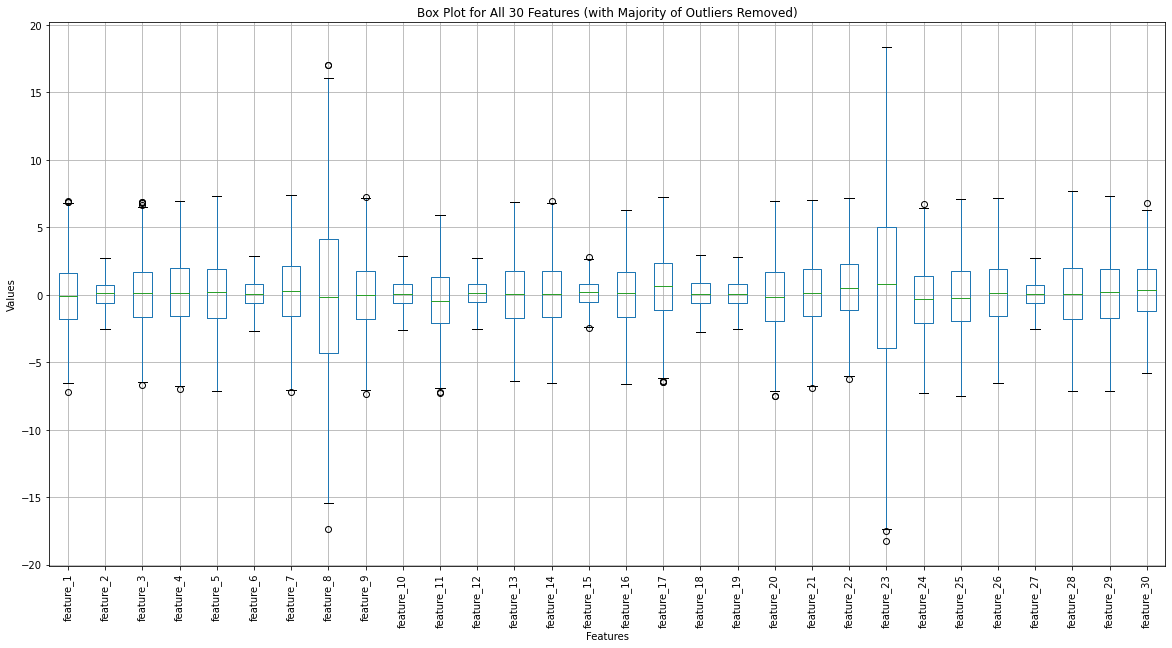

In [ ]:
plt.figure(figsize=(20, 10))

X_c.boxplot()

plt.title('Box Plot for All 30 Features (with Majority of Outliers Removed)')
plt.xlabel('Features')
plt.ylabel('Values')
plt.xticks(rotation=90)
plt.show()

Given the differing scales of the features, we standardize the data. 

In [ ]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)
X_1 = pd.DataFrame(scaled_data, columns=X.columns)
Y_1 = Y


In [ ]:
scaled_c = scaler.fit_transform(X_c)
X_2 = pd.DataFrame(scaled_c, columns=X_c.columns)
Y_2 = Y_c

Now, to get a better understanding of the data, let us do some clustering. 

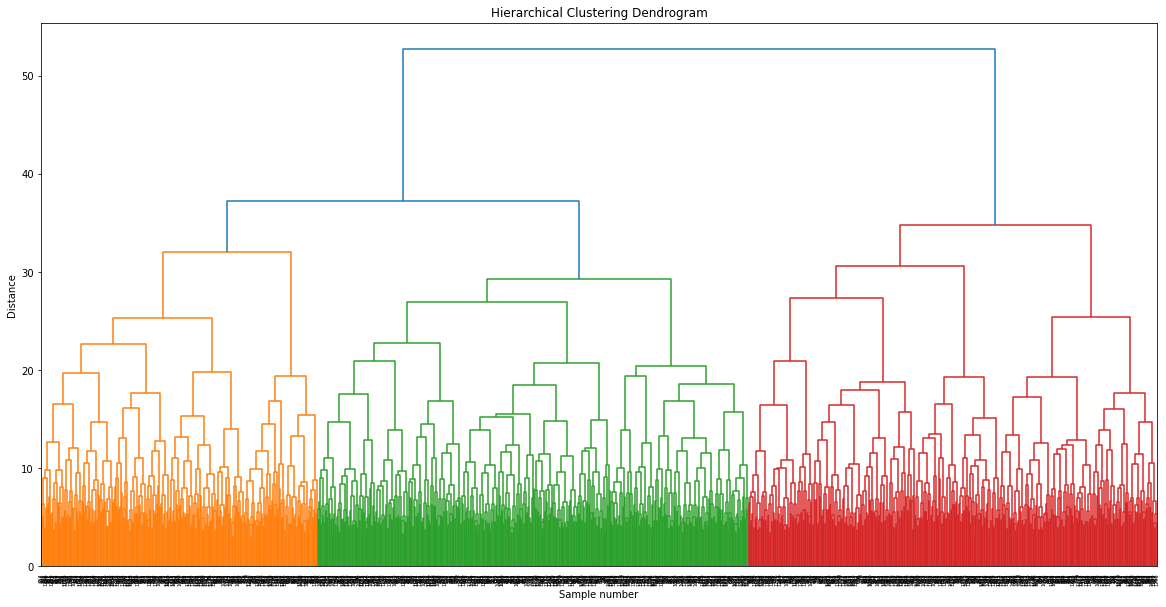

In [ ]:
linked = linkage(X_1, method='ward')

plt.figure(figsize=(20, 10))
dendrogram(linked, 
           orientation='top',
           labels=data.index,
           distance_sort='descending',
           show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample number')
plt.ylabel('Distance')
plt.show()

We initialize k means with different values of K, performing an elbow test to find the ideal number of clusters. 

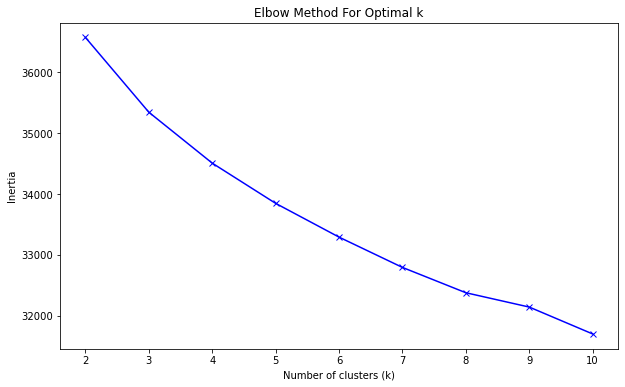

Optimal number of clusters: 3


In [ ]:
from sklearn.cluster import KMeans


def optimal_clusters(X):
    inertia = []
    K = range(2, 11)  

    vals = X.values
    for k in K:
        kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
        kmeans.fit(vals)
        inertia.append(kmeans.inertia_)

    first_derivative = np.diff(inertia)
    second_derivative = np.diff(first_derivative)

    if len(second_derivative) > 0:
        elbow_point = K[np.argmax(second_derivative) + 1]
    else:
        elbow_point = K[0]
        
        
    plt.figure(figsize=(10, 6))
    plt.plot(K, inertia, 'bx-')
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Inertia')
    plt.title('Elbow Method For Optimal k')
    plt.show(), 
    print(f"Optimal number of clusters: {elbow_point}")

optimal_clusters(X_1)





    

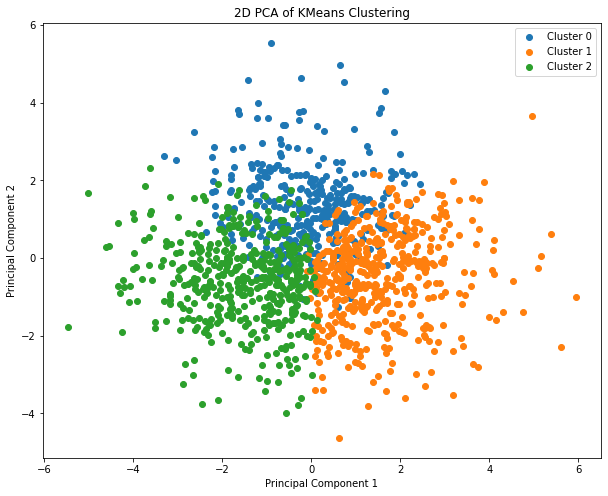

In [ ]:
from sklearn.decomposition import PCA

def K_Means_and_2D(k, X):
    vals = X.values
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    clusters = kmeans.fit_predict(vals)
    pca = PCA(n_components=2)
    vals_pca = pca.fit_transform(vals)

    # Dataframe for plotting 
    df_pca = pd.DataFrame(data=vals_pca, columns=['Principal Component 1', 'Principal Component 2'])
    df_pca['Cluster'] = clusters

    # 2D Rep. of Data
    plt.figure(figsize=(10, 8))
    for cluster in np.unique(clusters):
        plt.scatter(df_pca[df_pca['Cluster'] == cluster]['Principal Component 1'],
                    df_pca[df_pca['Cluster'] == cluster]['Principal Component 2'],
                    label=f'Cluster {cluster}')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('2D PCA of KMeans Clustering')
    plt.legend()
    plt.show()

K_Means_and_2D(3, X_1)

Both the hierarchical clustering and the elbow test seems to identify that the data is divided into three large sub-clusters. For one, this may be problematic because we are trying to classify the data into 4 separate groups. Second, from the 2D visualization, we can predict that the supper vector machine method may fail, as the data seems not to be linearly separable. 

Before we move on to the models, it is worthwhile to take a look at the unstandardized data: 

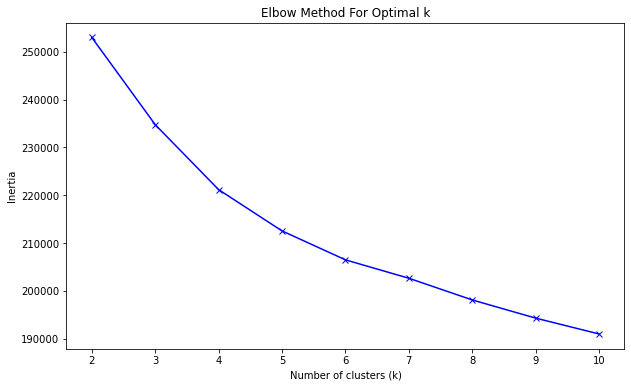

Optimal number of clusters: 4


In [ ]:
optimal_clusters(X)

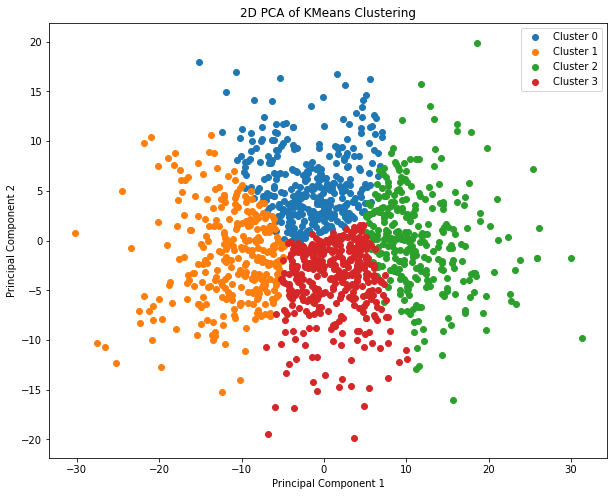

In [ ]:
K_Means_and_2D(4, X)

As we can see, the raw data has 4 optimal clusters and, although sitll not being linearly separable, seems to separate more nicely. Thus, we will also run Linear SVC on the unstandardized data, to see if it yields better results. 

One last remark before we move on to the models: we see that the number of labels is pretty balanced, so we elect to use accuracy_score as a way of evaluating our models. 

In [ ]:
label_counts = Y.value_counts()

print(label_counts)

0    332
2    329
3    322
1    317
Name: label, dtype: int64


# Comparing SVC vs. Random Forest #

Throughout this section, we will use the sklearn function RandomizedSearchCV to optimize our hyperparameters. This function also performs k-cross validation, ensuring robust results.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

## SVC ##

In [ ]:

from scipy.stats import uniform

# let us build a function, since we are planning to run LinearSVC on three datasets (X (original), X_1 (scaled), X_2 (scaled and without outliers))

def SVC_Model(X, Y):
    param_dist = {
        'C': uniform(0.01, 1),  
        'max_iter': [1000, 2000, 3000, 4000, 5000],
        'tol': uniform(1e-4, 1e-2),  
        'penalty': ['l1','l2'],  
        'loss': ['squared_hinge'] # we do not try hinge because it is incompatible with l1, l2 when dual=False
    }

    # we intialize our linear SVC: according to the documentation, we prefer dual when n_samples > n_features

    svm = LinearSVC(dual=False) 

    # initialize randomized search
    random_search = RandomizedSearchCV(svm, param_distributions=param_dist, n_iter=200, cv=10, scoring='accuracy', random_state=42)

    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
    random_search.fit(X_train, Y_train)
    
    best_svm = random_search.best_estimator_
    best_params = random_search.best_params_

    print("Best cross validation score: ", random_search.best_score_)
    print("Best parameters found: ", best_params)

    Y_pred = best_svm.predict(X_test)
    test_accuracy = accuracy_score(Y_test, Y_pred)
    print("Test set accuracy: ", test_accuracy)



 

Although we were planning to run the model on the raw data as well, in testing it was performing approximately the same as the regularized data set for a big tradeoff in efficiency, so we do not include it here. 

In [ ]:
SVC_Model(X_1,Y_1), SVC_Model(X_2,Y_2)

Best cross validation score:  0.5375000000000001
Best parameters found:  {'C': 0.09328441119525964, 'loss': 'squared_hinge', 'max_iter': 5000, 'penalty': 'l1', 'tol': 0.00612440925901119}
Test set accuracy:  0.5307692307692308
Best cross validation score:  0.5511764705882353
Best parameters found:  {'C': 0.016952130531190705, 'loss': 'squared_hinge', 'max_iter': 3000, 'penalty': 'l1', 'tol': 0.004948299713589833}
Test set accuracy:  0.4788732394366197


(None, None)

As predicted previously, the SVC model performs quite poorly. Therefore, we choose not to spend any further time optimizing the hyperparameters, since we predict the random forest classifier to be vastly better. 

The regularized data with outliers outperforms the one without outliers, as, although it has a lower 'best cross validation score' it has a much better test accuracy. Thus, we proceed only with the regularized data set X_1 and Y_1 from hereonforth (as we seem to be losing information by discarding the outliers). 



## Random Forest ##

Next, we implement the Random Forest Classifier.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_1, Y_1, test_size=0.2, random_state=42)

rf = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}


grid_search = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, 
                                 n_iter=100, cv=5, verbose=2, random_state=42, n_jobs=-1)


grid_search.fit(X_train, y_train)

print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Cross-Validation Score: {grid_search.best_score_}")


best_rf = grid_search.best_estimator_
y_pred_optimized = best_rf.predict(X_test)
print("Test set accuracy:", accuracy_score(y_test, y_pred_optimized))

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.8s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.9s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.9s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.9s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.0s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=500; total time=   4.1s
[CV] END bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   3.2s
[CV] END bootstrap=True, max_depth=30, max_fe

Clearly, the random forest classifier works better than the support vector machine, due to the presumed unlinearity of the data and the fact that it is better at capturing complex patterns. Although it is not included in this notebook, more iterations and cross-validation folds increased the runtime greatly without improving results. 

As an extension, we choose to test another ensemble learning method: the XGBoost classifier. 

## XG Boost ##


In [ ]:
import xgboost as xgb

In [ ]:
from xgboost import XGBClassifier

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 6, 9],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9],
    'gamma': [0, 0.1, 0.2],
    'learning_rate': [0.01, 0.05, 0.1]
}

xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

random_search = RandomizedSearchCV(estimator=xgb, param_distributions=param_grid, 
                                   n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)

random_search.fit(X_train, y_train)

print(f"Best Parameters: {random_search.best_params_}")

print(f"Best Cross-Validation Score: {random_search.best_score_}")

best_xgb = random_search.best_estimator_
y_pred_optimized = best_xgb.predict(X_test)

print("Test Set Accuracy:", accuracy_score(y_test, y_pred_optimized))

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.05, max_depth=3, min_child_weight=5, n_estimators=100, subsample=0.9; total time=   1.3s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.05, max_depth=3, min_child_weight=5, n_estimators=100, subsample=0.9; total time=   1.3s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.05, max_depth=3, min_child_weight=5, n_estimators=100, subsample=0.9; total time=   1.3s
[CV] END colsample_bytree=0.9, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=3, n_estimators=100, subsample=0.9; total time=   1.6s
[CV] END colsample_bytree=0.9, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=3, n_estimators=100, subsample=0.9; total time=   1.7s
[CV] END colsample_bytree=0.9, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=3, n_estimators=100, subsample=0.9; total time=   1.2s
[CV] END colsample_bytree=0.9, gamma=0.1, learning_rate=0.05,

We see that the XGBoost classifier actually performs worse than the Random Forest. With more parameter tuning, it would most probably outperform it but given the computational intensity of this task we elect to stick with the random forest model.

# Conclusion #

In conclusion, all the models were unable to classify the data very well. Perhaps with access to a stronger computer/faster chip more effective hypertuning would be possible. Another potential pitfall was the fact that perhaps the data could also, as seen in our clustering, be classified in a different way. In any case, to conclude this project we decided to stick with the following model and parameters:

 
Random Forest Classifier with parameters: 

{'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 20, 'bootstrap': True}

In [ ]:
test_data = pd.read_csv("/pathto/testdata.csv")
test_data = test_data.loc[:, 'feature_1':]

In [ ]:
predictions = best_rf.predict(test_data)

predictions_file_path = '/pathto/predictionsfile.txt'

with open(predictions_file_path, 'w') as file:
    for prediction in predictions:
        file.write(f"{prediction}\n")
